In [26]:
import numpy as np 
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [27]:
def erode_with_offset(image, kernel, offset):
  
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
   
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    offset_y, offset_x = offset


    for i in range(img_height):
        for j in range(img_width):
        
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # region_with_offset = region[offset_y:offset_y+1, offset_x:offset_x+1]
            region_point_value = region[offset_y, offset_x]
        
            if np.all(region[kernel == 1] == 1):
                output[i, j] = region_point_value
            else:
                output[i, j] = 0
                
    return output


In [36]:

def erode_image(image, kernel, iterations=1):
    
    # Розміри зображення та ядра
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Координати центру ядра
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Додаємо паддинг (відступи) до зображення
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Результуюче зображення
    output = image.copy()

    for _ in range(iterations):  # Виконуємо ерозію кілька разів
        temp_output = np.zeros_like(output)  # Для збереження проміжного результату

        # Проходимо по кожному пікселю вхідного зображення
        for i in range(img_height):
            for j in range(img_width):
                # Вибираємо регіон, який відповідає ядру
                region = padded_image[i:i + kernel_height, j:j + kernel_width]

                # Застосовуємо операцію ерозії: мінімальне значення пікселів під ядром
                if np.all(region[kernel == 1] == 1):  # Перевіряємо, чи всі одиничні елементи ядра співпадають
                    temp_output[i, j] = 1
                else:
                    temp_output[i, j] = 0

        # Оновлюємо зображення
        padded_image = np.pad(temp_output, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
        output = temp_output

    return output

In [28]:
img = cv2.imread("images/flower1.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [35]:
# plt.figure(figsize=(12, 10))

# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 2, 2)
# plt.imshow(gray_img,  cmap="gray")

In [ ]:
# kernel = np.ones((10, 10), dtype=np.uint8)

# output1 = erode_with_offset(gray_img, kernel, offset=(5, 5))

# plt.figure(figsize=(7, 7))
# plt.imshow(output1, cmap="gray")


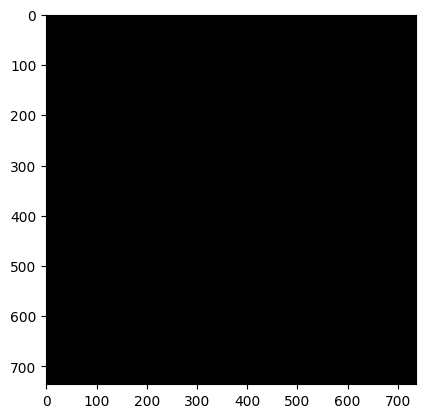

In [38]:
kernel = np.ones((10, 10), dtype=np.uint8)

output1 = erode_image(gray_img, kernel )

plt.imshow(output1, cmap="gray")

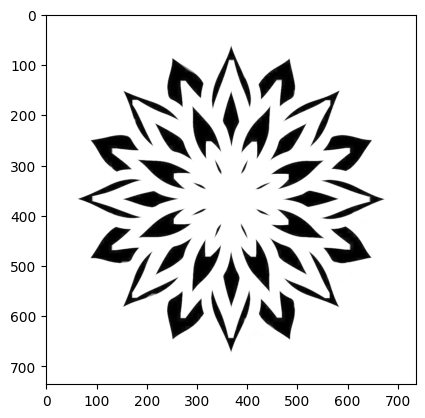

In [34]:
kernel2 = np.ones((10, 10), dtype=np.uint8)
output2 = cv2.dilate(gray_img, kernel2)

plt.imshow(output2, cmap="gray")